In [1]:
pip install tensorflow-macos

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow-metal

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!wget https://zenodo.org/record/4726653/files/plantnet_300K.zip

In [ ]:
!unzip plantnet_300K.zip

In [7]:
# Check for duplicate class names
import json

with open('plantnet_300K/plantnet300K_species_names.json', 'r') as file:
    data = json.load(file)

species_ids = {}

for key, species_name in data.items():
    if species_name in species_ids:
        species_ids[species_name].append(key)
    else:
        species_ids[species_name] = [key]

print("ID trùng nhau cho từng loài:")
for species_name, ids in species_ids.items():
    if len(ids) > 1:
        print(f"{species_name}: {', '.join(ids)}")


ID trùng nhau cho từng loài:
Lactuca_virosa: 1355868, 1432783
Pelargonium_peltatum: 1355959, 1394455
Pelargonium_zonale: 1355978, 1435714
Tradescantia_zebrina: 1356076, 1398178, 1422105
Asystasia_gangetica: 1356279, 1405641
Nymphaea_nouchali: 1356309, 1409296
Nephrolepis_cordifolia: 1356420, 1389294
Alliaria_petiolata: 1358150, 1392475
Lavandula_canariensis: 1358755, 1560405
Pancratium_maritimum: 1360978, 1421011
Cirsium_palustre: 1361759, 1503981
Freesia_refracta: 1362582, 1397556
Tradescantia_pallida: 1362927, 1408774
Schefflera_actinophylla: 1362954, 1399783, 1408657
Melilotus_officinalis: 1363750, 1393792
Duchesnea_indica: 1364000, 1411834
Guizotia_abyssinica: 1364112, 1392658
Calendula_arvensis: 1364161, 1390637, 1432786
Gynura_aurantiaca: 1373530, 1409191
Schkuhria_pinnata: 1374466, 1423286
Acalypha_hispida: 1375797, 1408688
Mussaenda_philippica: 1379556, 1420496
Vanilla_planifolia: 1387687, 1404481, 1419807
Acacia_saligna: 1389567, 1568914
Dryopteris_carthusiana: 1391805, 141182

In [ ]:
# Change the folder name to the class name
import os
import json
import shutil

base_directory = "plantnet_300K/images_test"

with open("plantnet_300K/plantnet300K_species_names.json", "r") as json_file:
    data = json.load(json_file)

new_to_original_mapping = {}

for folder_name in os.listdir(base_directory):
    if os.path.isdir(os.path.join(base_directory, folder_name)) and folder_name in data:
        new_folder_name = data[folder_name]
        source_path = os.path.join(base_directory, folder_name)
        
        while new_folder_name in new_to_original_mapping:
            new_folder_name += "_1"
        
        destination_path = os.path.join(base_directory, new_folder_name)
        
        if new_folder_name in new_to_original_mapping:
            shutil.copytree(source_path, destination_path)
        else:
            shutil.move(source_path, destination_path)
            new_to_original_mapping[new_folder_name] = folder_name


In [ ]:
# Delete the same class name
import os
import shutil

def move_files_between_directories(root_dir):
    for foldername, subfolders, filenames in os.walk(root_dir):
        for subfolder in subfolders:
            if subfolder.endswith("_1") or subfolder.endswith("_1_1"):
                target_folder_name = subfolder.rstrip("_1").rstrip("_1_1")
                target_folder_path = os.path.join(foldername, target_folder_name)
                
                if not os.path.exists(target_folder_path):
                    os.makedirs(target_folder_path)

                source_folder_path = os.path.join(foldername, subfolder)
                for filename in os.listdir(source_folder_path):
                    source_file = os.path.join(source_folder_path, filename)
                    target_file = os.path.join(target_folder_path, filename)
                    shutil.move(source_file, target_file)

                os.rmdir(source_folder_path)

root_directory = "plantnet_300K/images_train" 
move_files_between_directories(root_directory)

In [2]:
# Check the duplicate folder again

import os

def find_duplicate_directories(root_dir):
    duplicate_dirs = {}  # Sử dụng một từ điển để lưu trữ tên thư mục và đường dẫn đầy đủ
    for foldername, subfolders, filenames in os.walk(root_dir):
        for subfolder in subfolders:
            if subfolder.endswith("_1") or subfolder.endswith("_1_1"):
                full_path = os.path.join(foldername, subfolder)
                duplicate_dirs[subfolder] = full_path

    return duplicate_dirs

root_directory = "plantnet_300K/images_train"  # Thay thế bằng đường dẫn thư mục gốc của bạn
duplicates = find_duplicate_directories(root_directory)

if duplicates:
    print("Các thư mục trùng tên:")
    for name, path in duplicates.items():
        print(f"Tên thư mục: {name}")
        print(f"Đường dẫn đầy đủ: {path}")
else:
    print("Không có thư mục trùng tên được tìm thấy.")


Không có thư mục trùng tên được tìm thấy.


In [3]:
# Check the layer number and image number
import os

def count_folders_and_files(root_dir):
    num_folders = 0
    num_files = 0

    for foldername, subfolders, filenames in os.walk(root_dir):
        num_folders += len(subfolders)
        num_files += len(filenames)

    return num_folders, num_files

root_directory = "plantnet_300K/images_train"
num_folders, num_files = count_folders_and_files(root_directory)

print(f"Tổng số thư mục: {num_folders}")
print(f"Tổng số tập tin: {num_files}")

Tổng số thư mục: 1019
Tổng số tập tin: 243916


In [6]:
# Delete the .DS_Store file
import os

def delete_ds_store_files(root_dir):
    for foldername, subfolders, filenames in os.walk(root_dir):
        for filename in filenames:
            if filename == ".DS_Store":
                file_path = os.path.join(foldername, filename)
                os.remove(file_path)

root_directory = "plantnet_300K/images_train" 
delete_ds_store_files(root_directory)

In [6]:
# Create labels file
import json

with open('plantnet_300K/plantnet300K_species_names.json', 'r') as file:
    data = json.load(file)

labels = list(data.values())

print(labels)

file_name = "plantnet_300K/labels.txt"
with open(file_name, 'w') as file:
    for label in labels:
        file.write(label + '\n')

print(f"Danh sách nhãn đã được lưu vào tệp {file_name}.")

['Lactuca_virosa', 'Pelargonium_capitatum', 'Pelargonium_graveolens', 'Cirsium_arvense', 'Cirsium_vulgare', 'Pelargonium_odoratissimum', 'Pelargonium_peltatum', 'Pelargonium_quercifolium', 'Pelargonium_zonale', 'Mercurialis_annua', 'Phyllanthus_tenellus', 'Hypericum_perforatum', 'Egeria_densa', 'Ibicella_lutea', 'Tradescantia_fluminensis', 'Tradescantia_zebrina', 'Lamium_amplexicaule', 'Lavandula_dentata', 'Striga_asiatica', 'Melilotus_albus', 'Trifolium_fragiferum', 'Asystasia_gangetica', 'Nymphaea_nouchali', 'Dryopteris_aemula', 'Dryopteris_affinis', 'Dryopteris_filix-mas', 'Nephrolepis_cordifolia', 'Nephrolepis_exaltata', 'Osmunda_regalis', 'Achyranthes_aspera', 'Lithodora_fruticosa', 'Humulus_lupulus', 'Vaccaria_hispanica', 'Spergularia_rubra', 'Moehringia_trinervia', 'Calendula_officinalis', 'Calendula_stellata', 'Carthamus_caeruleus', 'Carthamus_lanatus', 'Cirsium_monspessulanum', 'Helminthotheca_echioides', 'Hyoseris_radiata', 'Lactuca_muralis', 'Lactuca_saligna', 'Lactuca_tener

In [7]:
# Remove duplicate lines in the labels file
with open('plantnet_300K/labels.txt', 'r') as f:
    lines = f.readlines()

# Using a set to store unique classes
unique_classes = set()

# Filter out duplicate classes
for line in lines:
    class_name = line.strip()
    if class_name not in unique_classes:
        unique_classes.add(class_name)

# Sort the unique classes
sorted_classes = sorted(unique_classes)

# Write the unique, sorted classes back to the file
with open('plantnet_300K/labels.txt', 'w') as f:
    for class_name in sorted_classes:
        f.write(class_name + '\n')


In [1]:
#train model
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout, Lambda
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

input_shape = (360, 360, 3)
image_size = 360
batch_size = 64
rescale = 1./255
dense_units = 1024
num_classes = 1019
learning_rate = 0.0001
lamda = 0.9
dropout = 0.8
epochs = 10

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(dense_units, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(dropout)(x)
x = Lambda(lambda x: x * lamda)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = True

optimizer = Adam(learning_rate=learning_rate) 
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

datagen = ImageDataGenerator(
    rescale=rescale
)

train_generator = datagen.flow_from_directory(
    'plantnet_300K/images_train',
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = datagen.flow_from_directory(
    'plantnet_300K/images_val',
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    'plantnet_300K/images_test',
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical'
)

model_checkpoint = ModelCheckpoint(filepath='model/plant_model_epoch{epoch:02d}.h5', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1)

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[early_stopping, model_checkpoint]
)

test_results = model.evaluate(test_generator, steps=len(test_generator))
print("Test Loss:", test_results[0])
print("Test Accuracy:", test_results[1])

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()


2023-11-28 21:23:54.701403: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-28 21:23:54.701427: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-11-28 21:23:54.701434: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-11-28 21:23:54.701674: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-28 21:23:54.701976: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Found 243916 images belonging to 1019 classes.
Found 31118 images belonging to 1019 classes.
Found 31112 images belonging to 1019 classes.
Epoch 1/10


2023-11-28 21:24:07.728440: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


3812/3812 [==============================] - ETA: 0s - loss: 3.6305 - accuracy: 0.3987 

/Users/khang/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3812/3812 [==============================] - 43622s 11s/step - loss: 3.6305 - accuracy: 0.3987 - val_loss: 5.9747 - val_accuracy: 0.0290
Epoch 2/10
1080/3812 [=======>......................] - ETA: 3:35:03 - loss: 5.5955 - accuracy: 0.0287

KeyboardInterrupt: 

In [8]:
#Convert model .h5 to .mlpackage
import coremltools as ct
import numpy as np
from tensorflow.keras.models import load_model

model = load_model('model/plant_model_epoch04.h5') # Keras модель

IMAGE_INPUT_NAME = ["input:0"]
IMAGE_INPUT_NAME_SHAPE = {'input:0':[1,360,360,3]}
IMAGE_INPUT_SCALE = 1.0/255.0
OUTPUT_NAME = ['InceptionV3/Predictions/Reshape_1:0']
MODEL_LABELS = 'plantnet_300K/labels.txt'
CORE_ML_MODEL = "model/plant_model.mlpackage"

coreml_model = ct.convert(model,
                          source = "tensorflow",
                          convert_to="mlprogram",
                          inputs = [ct.ImageType(shape=(1, 360, 360, 3), bias=[0,0,0], scale=1/255)],
                          classifier_config = ct.ClassifierConfig(MODEL_LABELS),
                          minimum_deployment_target=ct.target.iOS16, skip_model_load=True)

coreml_model.author = 'KhangB1910652'
coreml_model.short_description = 'Plant classifier model'
coreml_model.version= '1.0'
coreml_model.save(CORE_ML_MODEL)

Running MIL backend_mlprogram pipeline: 100%|██████████| 12/12 [00:00<00:00, 398.69 passes/s]


In [1]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

from tensorflow.keras.models import load_model

model = load_model('model/plant_model_epoch04.h5') # Keras модель

# Vẽ kiến trúc mô hình
plot_model(model, to_file='model/model_architecture.png', show_shapes=True, show_layer_names=True)


2023-11-19 15:36:53.656876: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-19 15:36:53.656897: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-11-19 15:36:53.656903: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-11-19 15:36:53.656946: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-19 15:36:53.657148: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 360, 360, 3)]        0         []                            
                                                                                                  
 conv2d_376 (Conv2D)         (None, 179, 179, 32)         864       ['input_5[0][0]']             
                                                                                                  
 batch_normalization_376 (B  (None, 179, 179, 32)         96        ['conv2d_376[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_376 (Activation  (None, 179, 179, 32)         0         ['batch_normalization_376[

Found 31112 images belonging to 1019 classes.
1/1 [==============================] - 0s 40ms/step


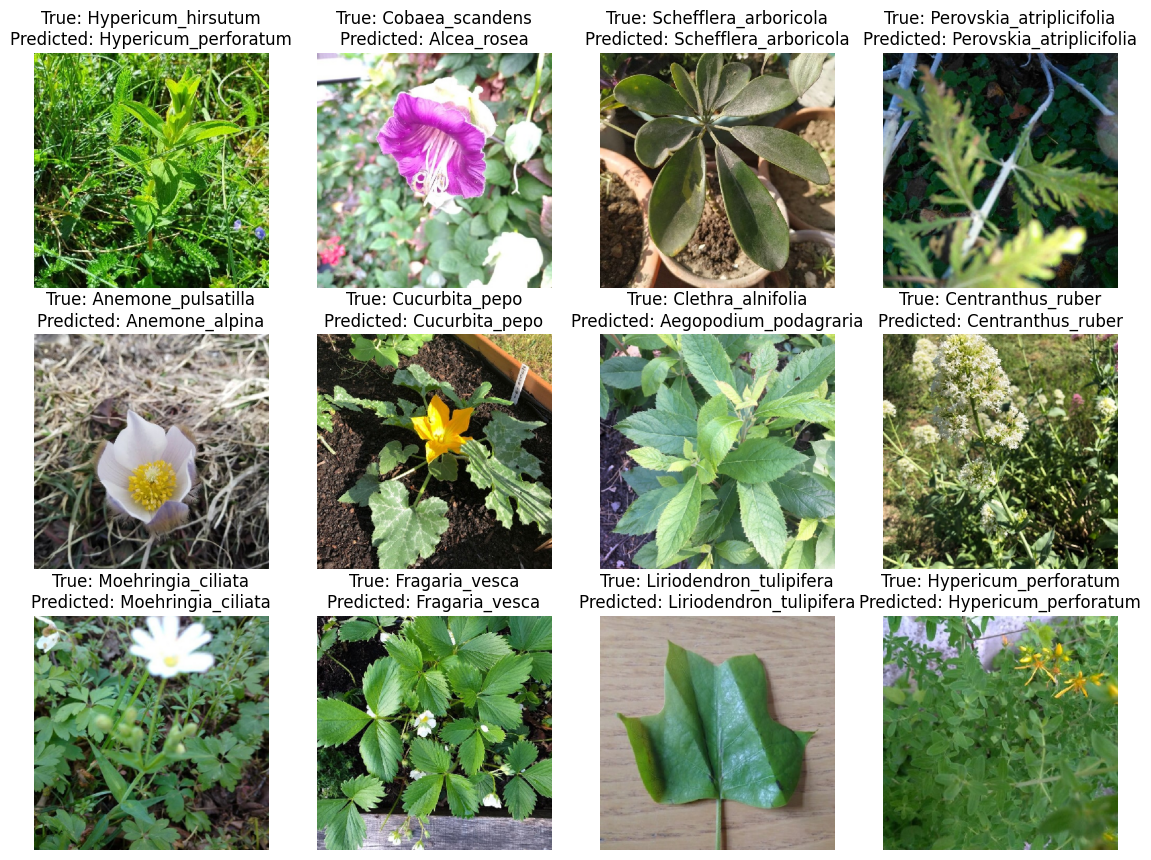

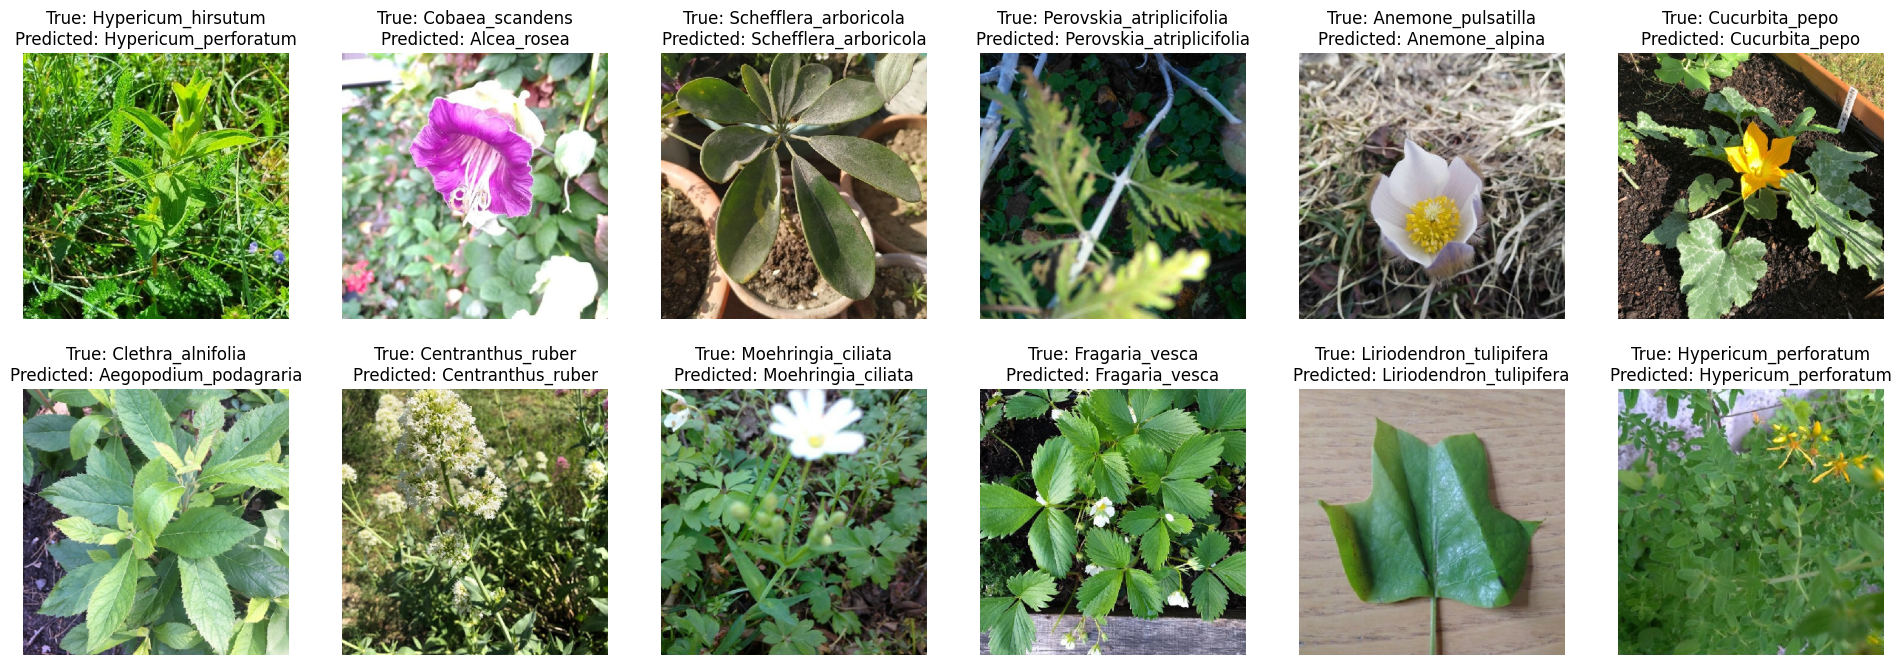

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

rescale = 1./255
image_size = 360
batch_size = 64


# Load model
model = load_model('model/plant_model_epoch04.h5')

datagen = ImageDataGenerator(
    rescale=rescale
)

test_generator = datagen.flow_from_directory(
    'plantnet_300K/images_test',
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical'
)

# Get class labels from the training data generator
label_file = 'plantnet_300K/labels.txt'
with open(label_file, 'r') as file:
    class_labels = [line.strip() for line in file]

# Function to decode predictions
def decode_predictions(predictions):
    return [class_labels[i] for i in np.argmax(predictions, axis=1)]

# Generate predictions for the test data
predictions = model.predict(test_generator, steps=len(test_generator))

# Select 9 random samples from the test set
random_samples = np.random.choice(len(test_generator.filepaths), size=12, replace=False)

# Plot the images with true and predicted labels
plt.figure(figsize=(14, 14))
for i, idx in enumerate(random_samples):
    img_path = test_generator.filepaths[idx]
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(image_size, image_size))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    true_label = class_labels[test_generator.classes[idx]]
    # Dự đoán
    predictions = model.predict(img_array)

    # Xác định lớp có xác suất cao nhất
    class_index = np.argmax(predictions)
    predicted_class = class_labels[class_index]

    plt.subplot(4, 4, i + 1)
    plt.imshow(img_array[0])
    plt.title(f'True: {true_label}\nPredicted: {predicted_class}')
    plt.axis('off')
plt.figure(figsize=(24, 8))
for i, idx in enumerate(random_samples):
    img_path = test_generator.filepaths[idx]
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(image_size, image_size))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    true_label = class_labels[test_generator.classes[idx]]
    # Dự đoán
    predictions = model.predict(img_array)

    # Xác định lớp có xác suất cao nhất
    class_index = np.argmax(predictions)
    predicted_class = class_labels[class_index]

    plt.subplot(2, 6, i + 1)
    plt.imshow(img_array[0])
    plt.title(f'True: {true_label}\nPredicted: {predicted_class}')
    plt.axis('off')
plt.show()

